In [1]:
# 필요 라이브러리 import 
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../../dataset/Ela_Undersampling.csv',encoding='CP949')

In [4]:
from sklearn.model_selection import train_test_split
ela_X = df.iloc[:,:-1]
ela_y = df['label']
ela_x_train, ela_x_test, ela_y_train, ela_y_test = train_test_split(ela_X, ela_y, test_size=0.2, random_state=0)

In [5]:
# 기본적인 LDA 구현
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(ela_x_train,ela_y_train)
lda_pred = lda_clf.predict(ela_x_test)
lda_pred_proba = lda_clf.predict_proba(ela_x_test)

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
# 디시전트리 구현
from sklearn.tree import DecisionTreeClassifier       
dt_clf = DecisionTreeClassifier(random_state=52)     
dt_clf.fit(ela_x_train, ela_y_train)
dt_pred = dt_clf.predict(ela_x_test)
dt_pred_proba = dt_clf.predict_proba(ela_x_test)

In [28]:
#디시전트리 하이퍼파라미터 구하기
tree = DecisionTreeClassifier()

# 딕셔너리로 전달
# key: 하이퍼파라미터 명; value: [후보값들] 을 리스트로 전달
param_grid = {
    'max_depth':[2,3,4,5,6,7,8], #7개
    'min_samples_leaf':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  #4개 --> 7x4 = 총 28개의 조합
}
grid_search = GridSearchCV(tree
                          , param_grid = param_grid
                          , cv = 5 #교차검증시 fold 개수; n번의 교차검증; 데이터들이 돌아가면서 하나씩 검증(validation)에 사용되어 일반화하는 것; 데이터가 많지 않을 때 보통 쓰인다고 함
                          , n_jobs = -1)  #-1: 모든 코어 사용

grid_search.fit(ela_x_train, ela_y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_search.best_params_, grid_search.best_score_))

최적 하이퍼 파라미터 :{'max_depth': 7, 'min_samples_leaf': 16}, 최적 평균 정확도 :0.937


In [8]:

#최적 하이퍼 파라미터 :{'max_depth': 6, 'min_samples_leaf': 16}, 최적 평균 정확도 :0.937
  
dt_clf_best = DecisionTreeClassifier(random_state=52,max_depth= 7,min_samples_leaf=16)     
dt_clf_best.fit(ela_x_train, ela_y_train)
dt_best_pred = dt_clf_best.predict(ela_x_test)
dt_best_pred_proba = dt_clf_best.predict_proba(ela_x_test)

In [9]:
# 랜덤포레스트 구현
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=52)     
rf_clf.fit(ela_x_train, ela_y_train)
rf_pred = rf_clf.predict(ela_x_test)
rf_pred_proba = rf_clf.predict_proba(ela_x_test)

In [16]:
# 하이퍼파라미터 Grid-Search
from sklearn.model_selection import GridSearchCV

# 탐색 범위 정의
grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [6,7,8],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4],
               'min_samples_split': [8],
               'n_estimators': [20]}

model = RandomForestClassifier()
grid = GridSearchCV(estimator = model, param_grid = grid_search, 
                               cv = 4,verbose=0, n_jobs = -1)
grid.fit(ela_x_train,ela_y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid.best_params_, grid.best_score_))


최적 하이퍼 파라미터 :{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 20}, 최적 평균 정확도 :0.939


c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [10]:
# 랜덤 포레스트 최적 하이퍼 파라미터 :{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 20}, 최적 평균 정확도 :0.939
rf_clf_best = RandomForestClassifier(random_state=52, criterion = 'gini', max_features= 'auto',
                                     max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=20)
rf_clf_best.fit(ela_x_train, ela_y_train)
rf_best_pred = rf_clf_best.predict(ela_x_test)
rf_best_pred_proba = rf_clf_best.predict_proba(ela_x_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [11]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression()
lr_clf.fit(ela_x_train, ela_y_train)
lr_pred = lr_clf.predict(ela_x_test)
lr_pred_proba = lr_clf.predict_proba(ela_x_test)



In [22]:
#로지스틱 회귀 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2','l1','elasticnet','None'],
          'C':[0.01,0.1,1,3,5,10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(ela_x_train,ela_y_train)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미어:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.923


c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\82104\AppData\Local\Progra

In [12]:
# 최적 하이퍼 파라미어:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.923
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression(C = 1, penalty= 'l2')
lr_clf.fit(ela_x_train, ela_y_train)
lr_best_pred = lr_clf.predict(ela_x_test)
lr_best_pred_proba = lr_clf.predict_proba(ela_x_test)

In [13]:
# KNN 모형 구현
from sklearn.neighbors import KNeighborsClassifier
# k-NN 분류기를 생성
knn_clf = KNeighborsClassifier(n_neighbors=5)
# 분류기 학습
knn_clf.fit(ela_x_train, ela_y_train)
# 예측
knn_pred = knn_clf.predict(ela_x_test)
knn_pred_proba = knn_clf.predict_proba(ela_x_test)


In [28]:
# knn 파라미터 구하기
from sklearn.metrics import accuracy_score
for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(ela_x_train, ela_y_train)
    knn_pred = knn_clf.predict(ela_x_test)
    knn_score=accuracy_score(ela_y_test,knn_pred)
    print(k)
    print(knn_score)
    


1
0.9192200557103064
2
0.9415041782729805
3
0.9387186629526463
4
0.9387186629526463
5
0.9415041782729805
6
0.9442896935933147
7
0.9415041782729805
8
0.9415041782729805
9
0.9387186629526463
10
0.9415041782729805


In [14]:
# knn 최적의 파라미터 모델 6에서 제일 높음
knn_clf = KNeighborsClassifier(n_neighbors=6)
# 분류기 학습
knn_clf.fit(ela_x_train, ela_y_train)
# 예측

knn_best_pred = knn_clf.predict(ela_x_test)
knn_best_pred_proba = knn_clf.predict_proba(ela_x_test)


In [33]:
ela_x_train.columns

Index(['[제조]비유동자산증가율', '[제조]자기자본증가율', '[제조]재고자산증가율', '[제조]매출액순이익률',
       '[제조]매입채무회전기간', '[제조]재고자산회전기간', '[제조]당좌자산회전률', '[제조]현금비율',
       '[제조]순운전자본비율', '[제조]자기자본배율'],
      dtype='object')

In [15]:
#XG 부스트 모형 구현
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance 
ela_x_train2 = ela_x_train.copy()
ela_x_test2 = ela_x_test.copy()
ela_y_train2 = ela_y_train.copy()
ela_y_test2 = ela_y_test.copy()
ela_x_train2.columns = [['비유동자산증가율', '자기자본증가율', '재고자산증가율', '매출액순이익률',
       '매입채무회전기간', '재고자산회전기간', '당좌자산회전률', '현금비율',
       '순운전자본비율', '자기자본배율']]
ela_x_test2.columns =[['비유동자산증가율', '자기자본증가율', '재고자산증가율', '매출액순이익률',
       '매입채무회전기간', '재고자산회전기간', '당좌자산회전률', '현금비율',
       '순운전자본비율', '자기자본배율']]

params_dict = {'objective' : 'binary:logistic',
               'n_estimators' : 400,
               'learning_rate' : 0.05,
               'max_depth' : 3,
               'eval_metric' : 'logloss'
               }

xgb_wrapper = XGBClassifier(Param=params_dict)

xgb_wrapper.fit(ela_x_train2, ela_y_train2, verbose = True)


xgb_pred = xgb_wrapper.predict(ela_x_test2)
xgb_pred_proba = xgb_wrapper.predict_proba(ela_x_test2)


[14:36:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [39]:
#xgb 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {
          'n_estimators':[40,43,46,50],
          'learning_rate':[0.005,0.008,0.01,0.03],
          'max_depth' : [1,2,3,4]
          }

grid_clf = GridSearchCV(xgb_wrapper, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(ela_x_train2,ela_y_train2)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local

[17:53:11] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:11] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:11] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local

[17:53:11] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:11] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:11] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local

[17:53:11] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:11] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:11] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:12] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:12] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:12] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local

[17:53:12] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:12] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:12] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:12] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:12] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:12] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:13] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:13] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:13] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:13] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:13] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:13] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:13] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:13] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:13] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:13] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:13] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:13] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:14] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:14] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:14] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:14] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:14] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:14] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:14] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:14] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:14] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:14] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:14] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:14] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:15] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:15] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:15] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:15] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:15] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:15] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:15] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:15] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:15] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:15] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:15] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:16] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:16] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:16] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:16] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:16] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:16] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:16] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:16] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:16] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:16] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:17] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:17] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:17] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:17] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:17] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:17] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:17] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:17] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:17] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:18] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:18] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:18] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:18] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:18] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:18] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:18] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:18] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:18] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:18] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:19] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:19] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:19] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:19] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:19] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:19] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:19] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:20] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:20] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:20] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:20] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:20] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:20] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:20] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:20] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:20] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:21] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:21] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:21] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:21] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:21] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:21] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:21] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:22] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:22] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:22] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:22] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:22] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:22] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:22] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:22] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:22] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local

[17:53:23] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:23] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:23] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local

[17:53:23] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:23] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:23] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local

[17:53:23] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:23] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:23] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local

[17:53:24] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:24] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:24] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local

[17:53:24] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:24] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:24] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local

[17:53:24] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:24] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:24] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local

[17:53:25] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:25] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:25] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:25] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:25] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:25] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:25] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:25] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:25] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:25] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:25] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:25] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:26] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:26] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:26] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:26] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:26] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:26] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:26] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:26] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:26] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:26] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:26] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:26] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:27] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:27] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:27] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:27] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:27] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:27] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:27] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:27] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:27] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:27] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:27] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:27] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:28] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:28] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:28] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:28] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:28] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:28] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:28] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:28] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:28] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:28] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:28] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:29] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:29] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:29] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:29] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:29] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:29] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:29] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:29] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:29] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:29] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:30] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:30] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:30] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:30] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:30] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:30] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:30] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:30] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:30] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:31] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:31] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:31] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:31] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:31] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:31] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:31] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:31] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:31] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:32] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:32] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:32] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:32] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:32] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:32] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:32] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:32] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:32] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:33] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:33] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:33] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:33] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:33] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:33] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local

[17:53:33] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:33] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:34] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local

[17:53:34] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:34] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:34] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local

[17:53:34] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:34] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:34] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local

[17:53:34] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:34] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:34] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local

[17:53:35] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:35] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:35] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:35] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:35] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:35] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local

[17:53:35] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:35] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:35] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:36] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:36] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:36] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:36] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:36] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:36] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:36] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:36] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:36] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:37] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:37] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:37] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:37] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:37] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:37] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:37] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:37] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:37] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:37] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:37] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:37] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:38] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:38] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:38] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:38] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:38] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:38] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:38] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:38] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:38] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:38] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:38] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:39] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:39] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:39] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:39] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:39] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:39] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:39] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:39] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:39] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:39] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:40] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:40] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:40] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:40] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:40] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:40] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:40] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:40] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:40] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:41] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:41] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:41] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:41] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:41] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:41] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:41] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:41] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:41] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:42] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:42] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:42] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:42] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:42] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:42] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:42] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:42] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:42] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local

[17:53:43] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:43] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:43] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:43] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:43] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:43] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:43] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:43] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:44] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:44] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:44] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:44] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:44] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:44] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:44] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:45] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:45] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:45] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local

[17:53:45] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:45] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:45] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local

[17:53:45] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:45] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:45] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local

[17:53:45] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:45] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:46] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:46] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:46] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:46] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:46] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:46] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:46] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:46] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:47] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:47] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local

[17:53:47] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:47] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:47] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:47] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:47] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:47] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:48] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:48] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local

[17:53:48] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:48] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:48] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:48] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:48] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:48] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:49] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:49] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:49] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:49] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:49] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:49] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:49] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:49] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:49] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:49] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:49] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:50] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:50] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:50] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:50] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:50] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:50] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:50] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:50] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:50] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:50] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:50] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:50] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:51] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:51] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:51] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:51] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:51] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:51] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:51] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:51] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:51] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:52] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:52] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:52] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:52] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:52] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:52] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:52] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:52] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:52] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:52] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:53] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:53] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:53] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:53] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:53] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:53] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:53] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:53] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:53] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:54] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:54] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:54] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local

[17:53:54] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:54] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:54] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:54] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:54] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:55] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:55] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:55] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:55] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:55] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:55] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:55] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:56] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:56] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:56] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:56] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:56] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:56] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:56] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:56] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:57] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:57] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:57] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:57] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrong

In [16]:
#최적 하이퍼 파라미어:{'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 40}, 최적 평균 정확도:0.937

xgb_wrapper = XGBClassifier(learning_rate= 0.03, max_depth= 4, n_estimators= 40)

xgb_wrapper.fit(ela_x_train2, ela_y_train2, verbose = True)

xgb_best_pred = xgb_wrapper.predict(ela_x_test)
xgb_best_pred_proba = xgb_wrapper.predict_proba(ela_x_test)

In [18]:
ela_y_train.reset_index(drop=True, inplace=True)
ela_y_test.reset_index(drop=True, inplace=True)
ela_x_train.reset_index(drop=True, inplace=True)
ela_x_test.reset_index(drop=True, inplace=True)

In [19]:
#퍼셉트론 구현
# eta : 학습률 (float), n_iter : 훈련 데이터 반복 횟수 (int), w_ : 학습된 가중치 (1d-array)
class Perceptron(object):
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1): #초기화
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    def fit(self, X, y): #학습
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0, scale = 0.01,
                             size = 1 + X.shape[1])
        
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for i in range(len(X)):
                xi = X.iloc[i].values
                target = y[i]
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def predict(self, X): #추론
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]



#초기(pc)
pc_clf = Perceptron(n_iter = 10)
pc_clf.fit(ela_x_train, ela_y_train)
pc_pred = pc_clf.predict(ela_x_test)






In [20]:
from sklearn.metrics import accuracy_score

pc_scores = []
for i in range(1,11):
    pc_clf = Perceptron(n_iter=i)
    pc_clf.fit(ela_x_train, ela_y_train)
    pc_pred = pc_clf.predict(ela_x_test)
    
    pc_scores=accuracy_score(ela_y_test, pc_pred)
    print(i)
    print(pc_scores)


1
0.8857938718662952
2
0.8885793871866295
3
0.9025069637883009
4
0.9080779944289693
5
0.9052924791086351
6
0.8857938718662952
7
0.8941504178272981
8
0.8857938718662952
9
0.8969359331476323
10
0.8857938718662952


In [21]:

pc_clf = Perceptron(n_iter = 5)
pc_clf.fit(ela_x_train, ela_y_train)
pc_best_pred = pc_clf.predict(ela_x_test)



### lda_pred : 선형판별 분석 예측 값
### dt_pred : 디시전트리 예측 값
### dt_best_pred : 랜덤 포레스트 최적의 파라미터 값
### rf_pred : 랜덤 포레스트 예측 값
### rf_best_pred : 랜덤 포레스트 최적의 파라미터 값
### lr_pred : 로지스틱 회귀 예측 값
### lr_best_pred : 랜덤 포레스트 최적의 파라미터 값
### knn_pred : knn 예측 값
### knn_best_pred : knn 최적의 파라미터 값
### xgb_pred : xgb 예측 값
### xgb_best_pred : 랜덤 포레스트 최적의 파라미터 값
### pc_pred : 퍼셉트론 예측 값


In [22]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, average_precision_score


import warnings

def get_clf_eval(ela_y_test, pred):
    confusion = confusion_matrix(ela_y_test, pred)
    accuracy = accuracy_score(ela_y_test, pred)
    precision = precision_score(ela_y_test, pred)
    recall = recall_score(ela_y_test, pred)
    roc_score = roc_auc_score(ela_y_test, pred)
    pr_score = average_precision_score(ela_y_test, pred)
    f1 = f1_score(ela_y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f},F1 스코어:{3:.4f}'.format(accuracy, precision, recall, f1, roc_score))
    print('ROC 스코어: {0:.4f}, PR score : {1:.4f}'.format(roc_score, pr_score))
    
print("lda") 
print(get_clf_eval(ela_y_test, lda_pred))
print("디시전트리") 
print(get_clf_eval(ela_y_test, dt_pred))
print("디시전트리 최적의 모델") 
print(get_clf_eval(ela_y_test, dt_best_pred))
print("랜덤포레스트") 
print(get_clf_eval(ela_y_test, rf_pred))
print("랜덤포레스트 최적의 모델") 
print(get_clf_eval(ela_y_test, rf_best_pred))
print("로지스틱") 
print(get_clf_eval(ela_y_test, lr_pred))
print("로지스틱회귀 최적의 모델")
print(get_clf_eval(ela_y_test, lr_best_pred))
print("Knn")
print(get_clf_eval(ela_y_test, knn_pred))
print("Knn 최적의 모델")
print(get_clf_eval(ela_y_test, knn_best_pred))
print("xgb")
print(get_clf_eval(ela_y_test, xgb_pred))
print("xgb 최적의 모델")
print(get_clf_eval(ela_y_test, xgb_best_pred))
print("다중 퍼셉트론")
print(get_clf_eval(ela_y_test, pc_pred))
print("다중 퍼셉트론 최적의 모델")
print(get_clf_eval(ela_y_test, pc_best_pred))



lda
오차행렬
[[325   7]
 [ 11  16]]
정확도: 0.9499, 정밀도 : 0.6957, 재현율:0.5926,F1 스코어:0.6400
ROC 스코어: 0.7858, PR score : 0.4429
None
디시전트리
오차행렬
[[315  17]
 [ 13  14]]
정확도: 0.9164, 정밀도 : 0.4516, 재현율:0.5185,F1 스코어:0.4828
ROC 스코어: 0.7337, PR score : 0.2704
None
디시전트리 최적의 모델
오차행렬
[[328   4]
 [ 15  12]]
정확도: 0.9471, 정밀도 : 0.7500, 재현율:0.4444,F1 스코어:0.5581
ROC 스코어: 0.7162, PR score : 0.3751
None
랜덤포레스트
오차행렬
[[329   3]
 [ 16  11]]
정확도: 0.9471, 정밀도 : 0.7857, 재현율:0.4074,F1 스코어:0.5366
ROC 스코어: 0.6992, PR score : 0.3647
None
랜덤포레스트 최적의 모델
오차행렬
[[327   5]
 [ 17  10]]
정확도: 0.9387, 정밀도 : 0.6667, 재현율:0.3704,F1 스코어:0.4762
ROC 스코어: 0.6777, PR score : 0.2943
None
로지스틱
오차행렬
[[330   2]
 [ 14  13]]
정확도: 0.9554, 정밀도 : 0.8667, 재현율:0.4815,F1 스코어:0.6190
ROC 스코어: 0.7377, PR score : 0.4563
None
로지스틱회귀 최적의 모델
오차행렬
[[330   2]
 [ 14  13]]
정확도: 0.9554, 정밀도 : 0.8667, 재현율:0.4815,F1 스코어:0.6190
ROC 스코어: 0.7377, PR score : 0.4563
None
Knn
오차행렬
[[328   4]
 [ 17  10]]
정확도: 0.9415, 정밀도 : 0.7143, 재현율:0.3704,F1 스코어:0.4878
ROC 스코어: 0.67

In [23]:
# lda 임계값에 따른 오차행렬및 스코어  ------------> 임계값 최적 : 재현율기준(0.1)/f1기준(0.5)
from sklearn.preprocessing import Binarizer
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# thresholds = [0.6,0.65,0.7,0.75,0.8,0.85,0.9]

def get_eval_by_threshold(ela_y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(ela_y_test, custom_predict)

get_eval_by_threshold(ela_y_test , lda_pred_proba[:,1].reshape(-1,1), thresholds)
# get_eval_by_threshold(ela_y_test , lda_pred[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[304  28]
 [  8  19]]
정확도: 0.8997, 정밀도 : 0.4043, 재현율:0.7037,F1 스코어:0.5135
ROC 스코어: 0.8097, PR score : 0.3068
임곗값: 0.2
오차행렬
[[313  19]
 [  9  18]]
정확도: 0.9220, 정밀도 : 0.4865, 재현율:0.6667,F1 스코어:0.5625
ROC 스코어: 0.8047, PR score : 0.3494
임곗값: 0.3
오차행렬
[[316  16]
 [ 10  17]]
정확도: 0.9276, 정밀도 : 0.5152, 재현율:0.6296,F1 스코어:0.5667
ROC 스코어: 0.7907, PR score : 0.3522
임곗값: 0.4
오차행렬
[[322  10]
 [ 10  17]]
정확도: 0.9443, 정밀도 : 0.6296, 재현율:0.6296,F1 스코어:0.6296
ROC 스코어: 0.7998, PR score : 0.4243
임곗값: 0.5
오차행렬
[[325   7]
 [ 11  16]]
정확도: 0.9499, 정밀도 : 0.6957, 재현율:0.5926,F1 스코어:0.6400
ROC 스코어: 0.7858, PR score : 0.4429
임곗값: 0.6
오차행렬
[[325   7]
 [ 12  15]]
정확도: 0.9471, 정밀도 : 0.6818, 재현율:0.5556,F1 스코어:0.6122
ROC 스코어: 0.7672, PR score : 0.4122
임곗값: 0.7
오차행렬
[[328   4]
 [ 13  14]]
정확도: 0.9526, 정밀도 : 0.7778, 재현율:0.5185,F1 스코어:0.6222
ROC 스코어: 0.7532, PR score : 0.4395
임곗값: 0.8
오차행렬
[[329   3]
 [ 16  11]]
정확도: 0.9471, 정밀도 : 0.7857, 재현율:0.4074,F1 스코어:0.5366
ROC 스코어: 0.6992, PR score : 0.3647
임곗값: 0.9

In [24]:
#디시전 트리
# 성능값 일정 
get_eval_by_threshold(ela_y_test , dt_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[315  17]
 [ 13  14]]
정확도: 0.9164, 정밀도 : 0.4516, 재현율:0.5185,F1 스코어:0.4828
ROC 스코어: 0.7337, PR score : 0.2704
임곗값: 0.2
오차행렬
[[315  17]
 [ 13  14]]
정확도: 0.9164, 정밀도 : 0.4516, 재현율:0.5185,F1 스코어:0.4828
ROC 스코어: 0.7337, PR score : 0.2704
임곗값: 0.3
오차행렬
[[315  17]
 [ 13  14]]
정확도: 0.9164, 정밀도 : 0.4516, 재현율:0.5185,F1 스코어:0.4828
ROC 스코어: 0.7337, PR score : 0.2704
임곗값: 0.4
오차행렬
[[315  17]
 [ 13  14]]
정확도: 0.9164, 정밀도 : 0.4516, 재현율:0.5185,F1 스코어:0.4828
ROC 스코어: 0.7337, PR score : 0.2704
임곗값: 0.5
오차행렬
[[315  17]
 [ 13  14]]
정확도: 0.9164, 정밀도 : 0.4516, 재현율:0.5185,F1 스코어:0.4828
ROC 스코어: 0.7337, PR score : 0.2704
임곗값: 0.6
오차행렬
[[315  17]
 [ 13  14]]
정확도: 0.9164, 정밀도 : 0.4516, 재현율:0.5185,F1 스코어:0.4828
ROC 스코어: 0.7337, PR score : 0.2704
임곗값: 0.7
오차행렬
[[315  17]
 [ 13  14]]
정확도: 0.9164, 정밀도 : 0.4516, 재현율:0.5185,F1 스코어:0.4828
ROC 스코어: 0.7337, PR score : 0.2704
임곗값: 0.8
오차행렬
[[315  17]
 [ 13  14]]
정확도: 0.9164, 정밀도 : 0.4516, 재현율:0.5185,F1 스코어:0.4828
ROC 스코어: 0.7337, PR score : 0.2704
임곗값: 0.9

In [25]:
# 디시전트리 최적 ------> 임계값 최적 : 재현율기준(0.1)/f1기준(0.5=0.6)

get_eval_by_threshold(ela_y_test , dt_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[292  40]
 [  8  19]]
정확도: 0.8663, 정밀도 : 0.3220, 재현율:0.7037,F1 스코어:0.4419
ROC 스코어: 0.7916, PR score : 0.2489
임곗값: 0.2
오차행렬
[[305  27]
 [ 10  17]]
정확도: 0.8969, 정밀도 : 0.3864, 재현율:0.6296,F1 스코어:0.4789
ROC 스코어: 0.7742, PR score : 0.2711
임곗값: 0.3
오차행렬
[[312  20]
 [ 10  17]]
정확도: 0.9164, 정밀도 : 0.4595, 재현율:0.6296,F1 스코어:0.5312
ROC 스코어: 0.7847, PR score : 0.3171
임곗값: 0.4
오차행렬
[[322  10]
 [ 13  14]]
정확도: 0.9359, 정밀도 : 0.5833, 재현율:0.5185,F1 스코어:0.5490
ROC 스코어: 0.7442, PR score : 0.3387
임곗값: 0.5
오차행렬
[[328   4]
 [ 15  12]]
정확도: 0.9471, 정밀도 : 0.7500, 재현율:0.4444,F1 스코어:0.5581
ROC 스코어: 0.7162, PR score : 0.3751
임곗값: 0.6
오차행렬
[[328   4]
 [ 15  12]]
정확도: 0.9471, 정밀도 : 0.7500, 재현율:0.4444,F1 스코어:0.5581
ROC 스코어: 0.7162, PR score : 0.3751
임곗값: 0.7
오차행렬
[[330   2]
 [ 18   9]]
정확도: 0.9443, 정밀도 : 0.8182, 재현율:0.3333,F1 스코어:0.4737
ROC 스코어: 0.6637, PR score : 0.3229
임곗값: 0.8
오차행렬
[[330   2]
 [ 19   8]]
정확도: 0.9415, 정밀도 : 0.8000, 재현율:0.2963,F1 스코어:0.4324
ROC 스코어: 0.6451, PR score : 0.2900
임곗값: 0.9

In [26]:
#로지스틱 회귀 -----------> 임계값 최적 : 재현율기준(0.1)/f1기준(0.3)

get_eval_by_threshold(ela_y_test , lr_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[279  53]
 [  5  22]]
정확도: 0.8384, 정밀도 : 0.2933, 재현율:0.8148,F1 스코어:0.4314
ROC 스코어: 0.8276, PR score : 0.2529
임곗값: 0.2
오차행렬
[[312  20]
 [  7  20]]
정확도: 0.9248, 정밀도 : 0.5000, 재현율:0.7407,F1 스코어:0.5970
ROC 스코어: 0.8402, PR score : 0.3899
임곗값: 0.3
오차행렬
[[322  10]
 [ 10  17]]
정확도: 0.9443, 정밀도 : 0.6296, 재현율:0.6296,F1 스코어:0.6296
ROC 스코어: 0.7998, PR score : 0.4243
임곗값: 0.4
오차행렬
[[327   5]
 [ 13  14]]
정확도: 0.9499, 정밀도 : 0.7368, 재현율:0.5185,F1 스코어:0.6087
ROC 스코어: 0.7517, PR score : 0.4183
임곗값: 0.5
오차행렬
[[330   2]
 [ 14  13]]
정확도: 0.9554, 정밀도 : 0.8667, 재현율:0.4815,F1 스코어:0.6190
ROC 스코어: 0.7377, PR score : 0.4563
임곗값: 0.6
오차행렬
[[330   2]
 [ 17  10]]
정확도: 0.9471, 정밀도 : 0.8333, 재현율:0.3704,F1 스코어:0.5128
ROC 스코어: 0.6822, PR score : 0.3560
임곗값: 0.7
오차행렬
[[330   2]
 [ 20   7]]
정확도: 0.9387, 정밀도 : 0.7778, 재현율:0.2593,F1 스코어:0.3889
ROC 스코어: 0.6266, PR score : 0.2574
임곗값: 0.8
오차행렬
[[331   1]
 [ 21   6]]
정확도: 0.9387, 정밀도 : 0.8571, 재현율:0.2222,F1 스코어:0.3529
ROC 스코어: 0.6096, PR score : 0.2490
임곗값: 0.9

In [27]:
# 로지 회귀 최적 파라미터 ------->임계값 최적 : 재현율기준(0.1)/f1기준(0.4)

get_eval_by_threshold(ela_y_test , lr_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[279  53]
 [  5  22]]
정확도: 0.8384, 정밀도 : 0.2933, 재현율:0.8148,F1 스코어:0.4314
ROC 스코어: 0.8276, PR score : 0.2529
임곗값: 0.2
오차행렬
[[312  20]
 [  7  20]]
정확도: 0.9248, 정밀도 : 0.5000, 재현율:0.7407,F1 스코어:0.5970
ROC 스코어: 0.8402, PR score : 0.3899
임곗값: 0.3
오차행렬
[[322  10]
 [ 10  17]]
정확도: 0.9443, 정밀도 : 0.6296, 재현율:0.6296,F1 스코어:0.6296
ROC 스코어: 0.7998, PR score : 0.4243
임곗값: 0.4
오차행렬
[[327   5]
 [ 13  14]]
정확도: 0.9499, 정밀도 : 0.7368, 재현율:0.5185,F1 스코어:0.6087
ROC 스코어: 0.7517, PR score : 0.4183
임곗값: 0.5
오차행렬
[[330   2]
 [ 14  13]]
정확도: 0.9554, 정밀도 : 0.8667, 재현율:0.4815,F1 스코어:0.6190
ROC 스코어: 0.7377, PR score : 0.4563
임곗값: 0.6
오차행렬
[[330   2]
 [ 17  10]]
정확도: 0.9471, 정밀도 : 0.8333, 재현율:0.3704,F1 스코어:0.5128
ROC 스코어: 0.6822, PR score : 0.3560
임곗값: 0.7
오차행렬
[[330   2]
 [ 20   7]]
정확도: 0.9387, 정밀도 : 0.7778, 재현율:0.2593,F1 스코어:0.3889
ROC 스코어: 0.6266, PR score : 0.2574
임곗값: 0.8
오차행렬
[[331   1]
 [ 21   6]]
정확도: 0.9387, 정밀도 : 0.8571, 재현율:0.2222,F1 스코어:0.3529
ROC 스코어: 0.6096, PR score : 0.2490
임곗값: 0.9

In [28]:
#랜덤 포레스트 -------------> 임계값 최적 : 재현율기준(0.1)/f1기준(0.3)

get_eval_by_threshold(ela_y_test , rf_pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[277  55]
 [  4  23]]
정확도: 0.8357, 정밀도 : 0.2949, 재현율:0.8519,F1 스코어:0.4381
ROC 스코어: 0.8431, PR score : 0.2623
임곗값: 0.2
오차행렬
[[306  26]
 [  8  19]]
정확도: 0.9053, 정밀도 : 0.4222, 재현율:0.7037,F1 스코어:0.5278
ROC 스코어: 0.8127, PR score : 0.3194
임곗값: 0.3
오차행렬
[[317  15]
 [  9  18]]
정확도: 0.9331, 정밀도 : 0.5455, 재현율:0.6667,F1 스코어:0.6000
ROC 스코어: 0.8107, PR score : 0.3887
임곗값: 0.4
오차행렬
[[326   6]
 [ 13  14]]
정확도: 0.9471, 정밀도 : 0.7000, 재현율:0.5185,F1 스코어:0.5957
ROC 스코어: 0.7502, PR score : 0.3992
임곗값: 0.5
오차행렬
[[329   3]
 [ 16  11]]
정확도: 0.9471, 정밀도 : 0.7857, 재현율:0.4074,F1 스코어:0.5366
ROC 스코어: 0.6992, PR score : 0.3647
임곗값: 0.6
오차행렬
[[330   2]
 [ 17  10]]
정확도: 0.9471, 정밀도 : 0.8333, 재현율:0.3704,F1 스코어:0.5128
ROC 스코어: 0.6822, PR score : 0.3560
임곗값: 0.7
오차행렬
[[331   1]
 [ 19   8]]
정확도: 0.9443, 정밀도 : 0.8889, 재현율:0.2963,F1 스코어:0.4444
ROC 스코어: 0.6466, PR score : 0.3163
임곗값: 0.8
오차행렬
[[331   1]
 [ 20   7]]
정확도: 0.9415, 정밀도 : 0.8750, 재현율:0.2593,F1 스코어:0.4000
ROC 스코어: 0.6281, PR score : 0.2826
임곗값: 0.9

In [48]:
#랜덤 포레스트 최적 파라미터 -------------->임계값 최적 : 재현율기준(0.1)/f1기준(0.3)

get_eval_by_threshold(ela_y_test , rf_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[277  55]
 [  5  22]]
정확도: 0.8329, 정밀도 : 0.2857, 재현율:0.8148,F1 스코어:0.4231
ROC 스코어: 0.8246, PR score : 0.2467
임곗값: 0.2
오차행렬
[[312  20]
 [  8  19]]
정확도: 0.9220, 정밀도 : 0.4872, 재현율:0.7037,F1 스코어:0.5758
ROC 스코어: 0.8217, PR score : 0.3651
임곗값: 0.3
오차행렬
[[321  11]
 [ 10  17]]
정확도: 0.9415, 정밀도 : 0.6071, 재현율:0.6296,F1 스코어:0.6182
ROC 스코어: 0.7982, PR score : 0.4101
임곗값: 0.4
오차행렬
[[323   9]
 [ 13  14]]
정확도: 0.9387, 정밀도 : 0.6087, 재현율:0.5185,F1 스코어:0.5600
ROC 스코어: 0.7457, PR score : 0.3518
임곗값: 0.5
오차행렬
[[327   5]
 [ 17  10]]
정확도: 0.9387, 정밀도 : 0.6667, 재현율:0.3704,F1 스코어:0.4762
ROC 스코어: 0.6777, PR score : 0.2943
임곗값: 0.6
오차행렬
[[330   2]
 [ 17  10]]
정확도: 0.9471, 정밀도 : 0.8333, 재현율:0.3704,F1 스코어:0.5128
ROC 스코어: 0.6822, PR score : 0.3560
임곗값: 0.7
오차행렬
[[331   1]
 [ 18   9]]
정확도: 0.9471, 정밀도 : 0.9000, 재현율:0.3333,F1 스코어:0.4865
ROC 스코어: 0.6652, PR score : 0.3501
임곗값: 0.8
오차행렬
[[331   1]
 [ 20   7]]
정확도: 0.9415, 정밀도 : 0.8750, 재현율:0.2593,F1 스코어:0.4000
ROC 스코어: 0.6281, PR score : 0.2826
임곗값: 0.9

In [29]:
#knn ----------->임계값 최적 : 재현율기준(0.1)/f1기준(0.2=0.3)

get_eval_by_threshold(ela_y_test , knn_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[288  44]
 [  8  19]]
정확도: 0.8552, 정밀도 : 0.3016, 재현율:0.7037,F1 스코어:0.4222
ROC 스코어: 0.7856, PR score : 0.2345
임곗값: 0.2
오차행렬
[[320  12]
 [ 14  13]]
정확도: 0.9276, 정밀도 : 0.5200, 재현율:0.4815,F1 스코어:0.5000
ROC 스코어: 0.7227, PR score : 0.2894
임곗값: 0.3
오차행렬
[[320  12]
 [ 14  13]]
정확도: 0.9276, 정밀도 : 0.5200, 재현율:0.4815,F1 스코어:0.5000
ROC 스코어: 0.7227, PR score : 0.2894
임곗값: 0.4
오차행렬
[[328   4]
 [ 17  10]]
정확도: 0.9415, 정밀도 : 0.7143, 재현율:0.3704,F1 스코어:0.4878
ROC 스코어: 0.6792, PR score : 0.3119
임곗값: 0.5
오차행렬
[[328   4]
 [ 17  10]]
정확도: 0.9415, 정밀도 : 0.7143, 재현율:0.3704,F1 스코어:0.4878
ROC 스코어: 0.6792, PR score : 0.3119
임곗값: 0.6
오차행렬
[[330   2]
 [ 20   7]]
정확도: 0.9387, 정밀도 : 0.7778, 재현율:0.2593,F1 스코어:0.3889
ROC 스코어: 0.6266, PR score : 0.2574
임곗값: 0.7
오차행렬
[[330   2]
 [ 20   7]]
정확도: 0.9387, 정밀도 : 0.7778, 재현율:0.2593,F1 스코어:0.3889
ROC 스코어: 0.6266, PR score : 0.2574
임곗값: 0.8
오차행렬
[[331   1]
 [ 20   7]]
정확도: 0.9415, 정밀도 : 0.8750, 재현율:0.2593,F1 스코어:0.4000
ROC 스코어: 0.6281, PR score : 0.2826
임곗값: 0.9

In [30]:
#knn 최적 파라미터 적용 ------------>임계값 최적 : 재현율기준(0.1)/f1기준(0.2=0.3)

get_eval_by_threshold(ela_y_test , knn_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[284  48]
 [  8  19]]
정확도: 0.8440, 정밀도 : 0.2836, 재현율:0.7037,F1 스코어:0.4043
ROC 스코어: 0.7796, PR score : 0.2218
임곗값: 0.2
오차행렬
[[314  18]
 [ 13  14]]
정확도: 0.9136, 정밀도 : 0.4375, 재현율:0.5185,F1 스코어:0.4746
ROC 스코어: 0.7322, PR score : 0.2631
임곗값: 0.3
오차행렬
[[314  18]
 [ 13  14]]
정확도: 0.9136, 정밀도 : 0.4375, 재현율:0.5185,F1 스코어:0.4746
ROC 스코어: 0.7322, PR score : 0.2631
임곗값: 0.4
오차행렬
[[326   6]
 [ 17  10]]
정확도: 0.9359, 정밀도 : 0.6250, 재현율:0.3704,F1 스코어:0.4651
ROC 스코어: 0.6761, PR score : 0.2788
임곗값: 0.5
오차행렬
[[330   2]
 [ 18   9]]
정확도: 0.9443, 정밀도 : 0.8182, 재현율:0.3333,F1 스코어:0.4737
ROC 스코어: 0.6637, PR score : 0.3229
임곗값: 0.6
오차행렬
[[330   2]
 [ 18   9]]
정확도: 0.9443, 정밀도 : 0.8182, 재현율:0.3333,F1 스코어:0.4737
ROC 스코어: 0.6637, PR score : 0.3229
임곗값: 0.7
오차행렬
[[330   2]
 [ 20   7]]
정확도: 0.9387, 정밀도 : 0.7778, 재현율:0.2593,F1 스코어:0.3889
ROC 스코어: 0.6266, PR score : 0.2574
임곗값: 0.8
오차행렬
[[330   2]
 [ 20   7]]
정확도: 0.9387, 정밀도 : 0.7778, 재현율:0.2593,F1 스코어:0.3889
ROC 스코어: 0.6266, PR score : 0.2574
임곗값: 0.9

In [32]:
#xgb -----------임계값 최적 : 재현율기준(0.1)/f1기준(0.2)
get_eval_by_threshold(ela_y_test , xgb_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[318  14]
 [ 11  16]]
정확도: 0.9304, 정밀도 : 0.5333, 재현율:0.5926,F1 스코어:0.5614
ROC 스코어: 0.7752, PR score : 0.3467
임곗값: 0.2
오차행렬
[[326   6]
 [ 12  15]]
정확도: 0.9499, 정밀도 : 0.7143, 재현율:0.5556,F1 스코어:0.6250
ROC 스코어: 0.7687, PR score : 0.4303
임곗값: 0.3
오차행렬
[[326   6]
 [ 13  14]]
정확도: 0.9471, 정밀도 : 0.7000, 재현율:0.5185,F1 스코어:0.5957
ROC 스코어: 0.7502, PR score : 0.3992
임곗값: 0.4
오차행렬
[[328   4]
 [ 14  13]]
정확도: 0.9499, 정밀도 : 0.7647, 재현율:0.4815,F1 스코어:0.5909
ROC 스코어: 0.7347, PR score : 0.4072
임곗값: 0.5
오차행렬
[[329   3]
 [ 16  11]]
정확도: 0.9471, 정밀도 : 0.7857, 재현율:0.4074,F1 스코어:0.5366
ROC 스코어: 0.6992, PR score : 0.3647
임곗값: 0.6
오차행렬
[[329   3]
 [ 17  10]]
정확도: 0.9443, 정밀도 : 0.7692, 재현율:0.3704,F1 스코어:0.5000
ROC 스코어: 0.6807, PR score : 0.3323
임곗값: 0.7
오차행렬
[[330   2]
 [ 18   9]]
정확도: 0.9443, 정밀도 : 0.8182, 재현율:0.3333,F1 스코어:0.4737
ROC 스코어: 0.6637, PR score : 0.3229
임곗값: 0.8
오차행렬
[[331   1]
 [ 19   8]]
정확도: 0.9443, 정밀도 : 0.8889, 재현율:0.2963,F1 스코어:0.4444
ROC 스코어: 0.6466, PR score : 0.3163
임곗값: 0.9

In [33]:
# xgb 최적 파라미터 적용------------>임계값 최적 : 재현율기준(0.1)/f1기준(0.4)

get_eval_by_threshold(ela_y_test , xgb_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[  0 332]
 [  0  27]]
정확도: 0.0752, 정밀도 : 0.0752, 재현율:1.0000,F1 스코어:0.1399
ROC 스코어: 0.5000, PR score : 0.0752
임곗값: 0.2
오차행렬
[[288  44]
 [  5  22]]
정확도: 0.8635, 정밀도 : 0.3333, 재현율:0.8148,F1 스코어:0.4731
ROC 스코어: 0.8411, PR score : 0.2855
임곗값: 0.3
오차행렬
[[314  18]
 [  8  19]]
정확도: 0.9276, 정밀도 : 0.5135, 재현율:0.7037,F1 스코어:0.5938
ROC 스코어: 0.8247, PR score : 0.3836
임곗값: 0.4
오차행렬
[[324   8]
 [ 11  16]]
정확도: 0.9471, 정밀도 : 0.6667, 재현율:0.5926,F1 스코어:0.6275
ROC 스코어: 0.7842, PR score : 0.4257
임곗값: 0.5
오차행렬
[[327   5]
 [ 14  13]]
정확도: 0.9471, 정밀도 : 0.7222, 재현율:0.4815,F1 스코어:0.5778
ROC 스코어: 0.7332, PR score : 0.3867
임곗값: 0.6
오차행렬
[[331   1]
 [ 18   9]]
정확도: 0.9471, 정밀도 : 0.9000, 재현율:0.3333,F1 스코어:0.4865
ROC 스코어: 0.6652, PR score : 0.3501
임곗값: 0.7
오차행렬
[[331   1]
 [ 20   7]]
정확도: 0.9415, 정밀도 : 0.8750, 재현율:0.2593,F1 스코어:0.4000
ROC 스코어: 0.6281, PR score : 0.2826
임곗값: 0.8
오차행렬
[[332   0]
 [ 23   4]]
정확도: 0.9359, 정밀도 : 1.0000, 재현율:0.1481,F1 스코어:0.2581
ROC 스코어: 0.5741, PR score : 0.2122
임곗값: 0.9

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


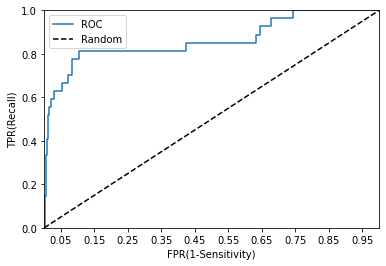

lda의 ROC AUC값: 0.8635


In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def roc_curve_plot(ela_y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(ela_y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(ela_y_test, lda_clf.predict_proba(ela_x_test)[:,1])
pred_proba = lda_clf.predict_proba(ela_x_test)[:,1]
roc_score = roc_auc_score(ela_y_test, pred_proba)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))


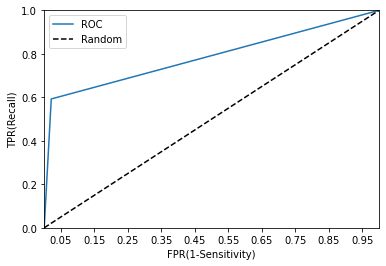

lda의 ROC AUC값: 0.7858


In [35]:
roc_curve_plot(ela_y_test, lda_clf.predict(ela_x_test))
roc_score = roc_auc_score(ela_y_test, lda_pred)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))

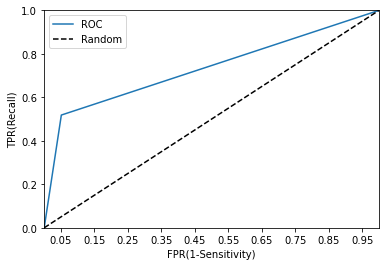

dt ROC AUC값: 0.7337


In [36]:
roc_curve_plot(ela_y_test, dt_clf.predict_proba(ela_x_test)[:,1])
pred_proba = dt_clf.predict_proba(ela_x_test)[:,1]
roc_score = roc_auc_score(ela_y_test, pred_proba)
print('dt ROC AUC값: {0:.4f}'.format(roc_score))


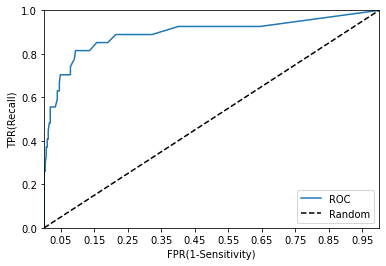

rf ROC AUC값: 0.8941


In [37]:
roc_curve_plot(ela_y_test, rf_clf.predict_proba(ela_x_test)[:,1])
pred_proba = rf_clf.predict_proba(ela_x_test)[:,1]
roc_score = roc_auc_score(ela_y_test, pred_proba)
print('rf ROC AUC값: {0:.4f}'.format(roc_score))

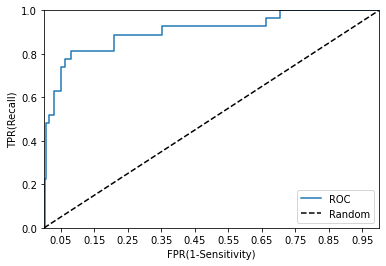

lr ROC AUC값: 0.9037


In [38]:
roc_curve_plot(ela_y_test, lr_clf.predict_proba(ela_x_test)[:,1])
pred_proba = lr_clf.predict_proba(ela_x_test)[:,1]
roc_score = roc_auc_score(ela_y_test, pred_proba)
print('lr ROC AUC값: {0:.4f}'.format(roc_score))

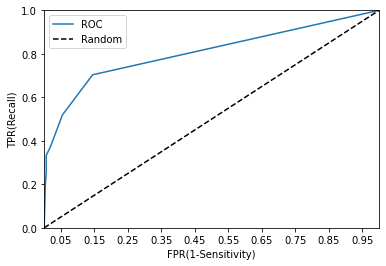

knn ROC AUC값: 0.8052


In [39]:
roc_curve_plot(ela_y_test, knn_clf.predict_proba(ela_x_test)[:,1])
pred_proba = knn_clf.predict_proba(ela_x_test)[:,1]
roc_score = roc_auc_score(ela_y_test, pred_proba)
print('knn ROC AUC값: {0:.4f}'.format(roc_score))